<a href="https://colab.research.google.com/github/lonespear/ma103/blob/main/ranger_school_log_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Logistic Regression

In **Logistic Regression**, we are predicting an outcome that is **binary**—this means the outcome can only have two possible values. For example, if you want to predict if a person passes or fails a test, the possible outcomes would be "Pass" or "Fail."

Unlike linear regression, where we predict continuous values, logistic regression helps us predict probabilities for these two outcomes.

### Step 1: Linear Combination of Predictors

Just like in linear regression, logistic regression starts by calculating a **linear combination** of the input features (predictors). The formula looks like this:

$$ z = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n $$

- \( \beta_0 \) is the **intercept** (a constant).
- \( \beta_1, \beta_2, \dots, \beta_n \) are the **coefficients** (weights).
- \( X_1, X_2, \dots, X_n \) are the **predictors** (input features).

The result, \( z \), is just a number that we call the **logit**. But we can’t use this logit to directly predict whether someone will pass or fail, because it's not a probability yet.

### Step 2: The Sigmoid Function

We need a way to turn this number, \( z \), into a probability between 0 and 1. To do this, we use the **Sigmoid Function**:

$$ \hat{y} = \frac{1}{1 + e^{-z}} $$

The sigmoid function squashes the value of \( z \) to a range between 0 and 1, which we can interpret as the **probability** of the outcome being "Pass" (or 1). If \( \hat{y} \) is close to 1, it’s very likely the person will pass. If \( \hat{y} \) is close to 0, it’s likely they will fail.

- \( \hat{y} \) is the predicted probability of the positive class (e.g., Pass).
- \( e \) is the mathematical constant (Euler's number, approx. 2.718).

### Step 3: Making Predictions

Once we have the probability \( \hat{y} \), we can set a **threshold** (usually 0.5). If \( \hat{y} \geq 0.5 \), we predict "Pass." If \( \hat{y} < 0.5 \), we predict "Fail."

### Example in Logistic Regression

Let's say we are predicting whether a cadet passes Ranger School based on their 12-mile ruck time:

1. \( X_1 \) = 12-mile ruck time (in minutes).
2. \( \beta_0 \) = 10 (the intercept).
3. \( \beta_1 \) = -0.05 (the weight associated with ruck time).

The linear combination is:

$$ z = 10 + (-0.05) \times X_1 $$

If the cadet finishes the ruck in 180 minutes:

$$ z = 10 + (-0.05) \times 180 = 1 $$

Now, use the sigmoid function:

$$ \hat{y} = \frac{1}{1 + e^{-1}} \approx 0.73 $$

This means the probability of passing is 73%. Since this is greater than 0.5, we predict that the cadet will pass.

### Visualizing the Sigmoid Function

The sigmoid function looks like an "S" shape, where very large negative numbers approach 0, and very large positive numbers approach 1.

### Recap

- Logistic Regression helps us predict binary outcomes.
- We calculate a linear combination of the input features, \( z \).
- We apply the sigmoid function to get a probability between 0 and 1.
- We set a threshold (usually 0.5) to classify the outcome as "Pass" or "Fail."

This makes logistic regression a powerful tool for classification tasks, especially when you want to predict probabilities of different outcomes.


In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('https://raw.githubusercontent.com/lonespear/ma103/refs/heads/main/Ranger_School_Data.csv')
df.drop('State', axis=1, inplace=True)
df['ln_score'].fillna(df['ln_score'].median(), inplace=True)
df = df[df['spr_raw'] <= 20]
df = df[df['hgt_in'] <= 100]
df = df[df['bmi'] <= 50]
df = df[df['rpa_pullups_raw'] <= 100]

<ipython-input-43-3cb42a252336>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ln_score'].fillna(df['ln_score'].median(), inplace=True)


In [44]:
df.head()

,Record Number,mdl_raw,mdl_points,spr_raw,spr_points,hrpu_raw,hpru_points,sdc_raw,sdc_points,plk_points,...,ln_score,acft_points,rpa_points,12mRuck_min,age,hgt_in,wt_lb,bmi,gender,Ranger_tab
0,1,240,78,8,75,42,82,87,100,100,...,10.0,535,364,135,28,71,170,23,1,1
2,3,170,64,5,62,10,60,103,80,60,...,8.0,413,327,182,26,67,148,23,0,1
3,4,260,82,9,79,25,67,99,98,76,...,7.0,490,322,129,28,74,189,23,1,1
4,5,340,100,10,83,53,93,84,100,100,...,9.0,576,375,130,28,70,180,25,1,1
5,6,300,90,12,97,44,84,78,100,94,...,8.0,565,367,123,28,69,184,26,1,1


In [45]:
df.describe()

,Record Number,mdl_raw,mdl_points,spr_raw,spr_points,hrpu_raw,hpru_points,sdc_raw,sdc_points,plk_points,...,ln_score,acft_points,rpa_points,12mRuck_min,age,hgt_in,wt_lb,bmi,gender,Ranger_tab
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,...,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,147.831579,251.017544,80.578947,8.568421,77.996491,32.028070,72.957895,102.845614,92.943860,73.757895,...,7.382456,486.129825,303.522807,161.203509,24.361404,69.722807,179.642105,25.214035,0.785965,0.312281
std,84.103389,57.909744,11.785566,2.311877,13.661269,11.736811,11.953769,17.596335,10.826269,25.446457,...,2.156967,65.016038,29.022884,34.516081,2.528552,3.529105,29.323085,2.769263,0.410873,0.464239
min,1.000000,130.000000,50.000000,3.000000,5.000000,0.000000,0.000000,76.000000,61.000000,0.000000,...,0.000000,256.000000,229.000000,38.000000,20.000000,60.000000,20.000000,17.000000,0.000000,0.000000
25%,76.000000,220.000000,74.000000,7.000000,69.000000,25.000000,67.000000,90.000000,90.000000,72.000000,...,7.000000,463.000000,284.000000,139.000000,22.000000,67.000000,163.000000,23.000000,1.000000,0.000000
50%,148.000000,260.000000,82.000000,9.000000,79.000000,34.000000,74.000000,98.000000,99.000000,80.000000,...,8.000000,505.000000,296.000000,152.000000,24.000000,70.000000,181.000000,25.000000,1.000000,0.000000
75%,221.000000,300.000000,90.000000,10.000000,87.000000,40.000000,80.000000,110.000000,100.000000,86.000000,...,9.000000,529.000000,325.000000,172.000000,27.000000,72.000000,198.000000,27.000000,1.000000,1.000000
max,293.000000,340.000000,100.000000,14.000000,100.000000,57.000000,97.000000,177.000000,100.000000,100.000000,...,10.000000,583.000000,375.000000,299.000000,28.000000,81.000000,270.000000,36.000000,1.000000,1.000000


In [ ]:
df['12mRuck_min'].describe()

,12mRuck_min
count,285.000000
mean,161.203509
std,34.516081
min,38.000000
25%,139.000000
50%,152.000000
75%,172.000000
max,299.000000


In [46]:
df.columns

Index(['Record Number', 'mdl_raw', 'mdl_points', 'spr_raw', 'spr_points',
       'hrpu_raw', 'hpru_points', 'sdc_raw', 'sdc_points', 'plk_points',
       'x2mr_raw', 'x2mr_points', 'rpa_pushups_raw', 'rpa_situps_raw',
       'rpa_5mi_sec', 'rpa_pullups_raw', 'ln_score', 'acft_points',
       'rpa_points', '12mRuck_min', 'age', 'hgt_in', 'wt_lb', 'bmi', 'gender',
       'Ranger_tab'],
      dtype='object')

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Ranger_tab', 'Record Number'], axis=1), df['Ranger_tab'], test_size=0.2, random_state=42)

# Create a pipeline that first scales the data, then applies logistic regression
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Fit the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [48]:
# Access the Logistic Regression model within the pipeline
logistic_model = model.named_steps['logisticregression']

# Get the coefficients
coefficients = logistic_model.coef_[0]  # For binary classification, there's only one set of coefficients
intercept = logistic_model.intercept_[0]

# Print the coefficients and intercept
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

# If you want to pair the coefficients with the feature names
feature_names = X_train.columns  # Assuming X_train is a DataFrame
coeff_dict = dict(zip(feature_names, coefficients))
print("Feature Coefficients:")
print(coeff_dict)

Intercept: -2.0696125421138234
Coefficients: [-0.17502549  0.02818826 -0.03282898  0.50494737  0.09873591 -0.37320666
 -1.05391704 -1.13688147  0.05644281 -0.49169122 -0.08658264  0.12626887
  0.09827373 -0.0114062   0.00507647  0.16612908 -0.14393769  0.57426826
 -3.79497555  0.10863793 -0.29603591 -0.80561369 -0.1786324  -1.21698295]
Feature Coefficients:
{'mdl_raw': -0.17502549257604072, 'mdl_points': 0.02818825586951328, 'spr_raw': -0.03282898122252401, 'spr_points': 0.5049473677992595, 'hrpu_raw': 0.0987359070824348, 'hpru_points': -0.3732066629927441, 'sdc_raw': -1.0539170369514648, 'sdc_points': -1.1368814671209315, 'plk_points': 0.05644280941014819, 'x2mr_raw': -0.4916912185935454, 'x2mr_points': -0.08658264166075355, 'rpa_pushups_raw': 0.12626887318333943, 'rpa_situps_raw': 0.09827372651633041, 'rpa_5mi_sec': -0.011406198894186379, 'rpa_pullups_raw': 0.005076473677517741, 'ln_score': 0.166129081262249, 'acft_points': -0.14393769017992808, 'rpa_points': 0.5742682577678424, '12m

# Confusion Matrix Breakdown:

For binary classification, the confusion matrix is structured like this:

|               | Predicted Positive | Predicted Negative |
|---------------|--------------------|--------------------|
| **Actual Positive**  | True Positive (TP)      | False Negative (FN)     |
| **Actual Negative**  | False Positive (FP)     | True Negative (TN)      |

- **True Positive (TP)**: The model correctly predicts the positive class.
- **False Positive (FP)**: The model incorrectly predicts the positive class (a "false alarm").
- **False Negative (FN)**: The model incorrectly predicts the negative class (a "miss").
- **True Negative (TN)**: The model correctly predicts the negative class.

# 1. Accuracy:
Accuracy is the ratio of the number of correct predictions (both positives and negatives) to the total number of predictions.

\[
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
\]

- **Numerator**: This represents all the correct predictions, both for the positive class (TP) and the negative class (TN).
- **Denominator**: This is the total number of instances (all four values from the confusion matrix).

# 2. Precision:
Precision focuses on the positive predictions. It tells us how many of the instances that were predicted as positive are actually positive. It's the ratio of true positives to the total number of predicted positives (which includes both true positives and false positives).

\[
\text{Precision} = \frac{TP}{TP + FP}
\]

- **Numerator**: This represents the number of true positives (correct positive predictions).
- **Denominator**: This is the total number of predicted positives, both correct (TP) and incorrect (FP).

# Intuitive Explanation:
- **Accuracy** answers: "Out of all predictions, how many did we get right?"
- **Precision** answers: "Out of all the instances predicted as positive, how many were actually positive?"

# Explanation:
Let's say you have a model and a confusion matrix like this:

|               | Predicted Positive | Predicted Negative |
|---------------|--------------------|--------------------|
| **Actual Positive**  | 12 (TP)              | 4 (FN)            |
| **Actual Negative**  | 3 (FP)               | 39 (TN)            |

### Accuracy:
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{12 + 39}{12 + 39 + 3 + 4} = \frac{52}{59} = 0.881 \text{ or } 88.1\%
$$

### Precision:
$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{12}{12 + 3} = \frac{12}{15} \approx 0.8 \text{ or } 80\%
$$


- **Accuracy**: Your model made 52 correct predictions out of 59 total instances, so the accuracy is 88%.
- **Precision**: Of the 15 instances the model predicted as positive, 12 were actually positive, giving you a precision of 80%.

This approach lets you manually calculate and explain these metrics using the actual components of the confusion matrix.


In [ ]:
mean_squared_error(y_test, y_pred)

0.14035087719298245

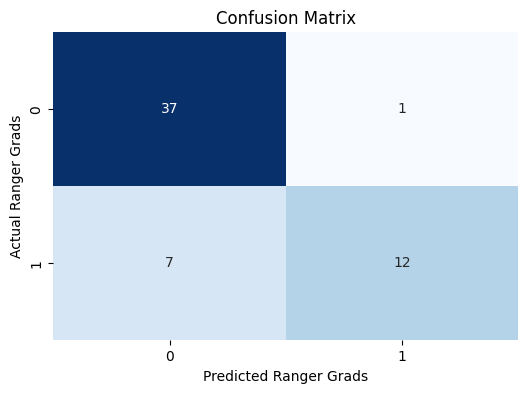

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap for better visualization
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Ranger Grads')
plt.ylabel('Actual Ranger Grads')
plt.show()

            Feature  Coefficient  Importance
18      12mRuck_min    -3.794976    3.794976
23           gender    -1.216983    1.216983
7        sdc_points    -1.136881    1.136881
6           sdc_raw    -1.053917    1.053917
21            wt_lb    -0.805614    0.805614
17       rpa_points     0.574268    0.574268
3        spr_points     0.504947    0.504947
9          x2mr_raw    -0.491691    0.491691
5       hpru_points    -0.373207    0.373207
20           hgt_in    -0.296036    0.296036
22              bmi    -0.178632    0.178632
0           mdl_raw    -0.175025    0.175025
15         ln_score     0.166129    0.166129
16      acft_points    -0.143938    0.143938
11  rpa_pushups_raw     0.126269    0.126269
19              age     0.108638    0.108638
4          hrpu_raw     0.098736    0.098736
12   rpa_situps_raw     0.098274    0.098274
10      x2mr_points    -0.086583    0.086583
8        plk_points     0.056443    0.056443
2           spr_raw    -0.032829    0.032829
1        m

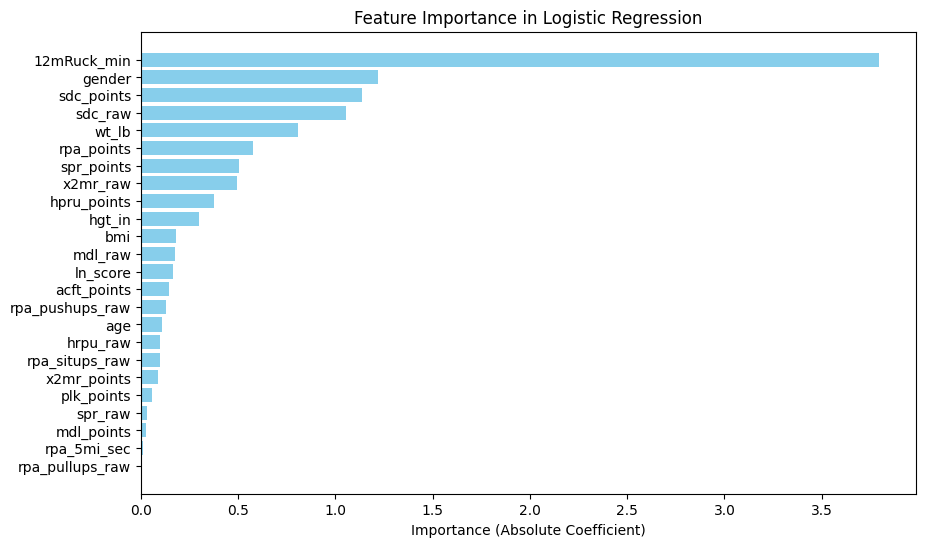

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Importance': np.abs(coefficients)  # Taking absolute value for importance
})

# Sort features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance
print(feature_importance)

# Visualize the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance (Absolute Coefficient)')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [ ]:
# Extract the coefficient for the 12-mile ruck time feature
ruck_time_coefficient = logistic_model.coef_[0][X_train.columns.get_loc('12mRuck_min')]

# Calculate the odds ratio
odds_ratio = np.exp(ruck_time_coefficient / np.std(X_train['12mRuck_min']))

# Convert odds ratio to percentage change in passing odds
percentage_change = (odds_ratio - 1) * 100

print(f"If you increase your 12-mile ruck time by 1 minute, the odds of passing Ranger School change by {percentage_change:.2f}%")

If you increase your 12-mile ruck time by 1 minute, the odds of passing Ranger School change by -10.01%


In [ ]:
# Extract the coefficient for the 12-mile ruck time feature
gender_coefficient = logistic_model.coef_[0][X_train.columns.get_loc('gender')]

# Calculate the odds ratio
odds_ratio = np.exp(gender_coefficient * np.std(X_train['gender']))

# Convert odds ratio to percentage change in passing odds
percentage_change = (odds_ratio - 1) * 100

print(f"If you increase your 12-mile ruck time by 1 minute, the odds of passing Ranger School change by {percentage_change:.2f}%")

If you increase your 12-mile ruck time by 1 minute, the odds of passing Ranger School change by -48.26%


In [ ]:
df['12mRuck_min'].describe()

,12mRuck_min
count,289.000000
mean,161.211073
std,34.390533
min,38.000000
25%,139.000000
50%,152.000000
75%,172.000000
max,299.000000


In [ ]:
df.loc[df['12mRuck_min'] <= 240].Ranger_tab.value_counts()

,count
Ranger_tab,
0,182
1,91


In [ ]:
model.predict_proba(X_test.iloc[[5]])

array([[0.92452132, 0.07547868]])

In [ ]:
X_test.iloc[5]

,156
mdl_raw,340.0
mdl_points,100.0
spr_raw,11.0
spr_points,92.0
hrpu_raw,46.0
hpru_points,86.0
sdc_raw,88.0
sdc_points,100.0
plk_points,80.0
x2mr_raw,969.0


In [ ]:
colnames = X_train.columns.tolist()

In [ ]:
colnames

['mdl_raw',
 'mdl_points',
 'spr_raw',
 'spr_points',
 'hrpu_raw',
 'hpru_points',
 'sdc_raw',
 'sdc_points',
 'plk_points',
 'x2mr_raw',
 'x2mr_points',
 'rpa_pushups_raw',
 'rpa_situps_raw',
 'rpa_5mi_sec',
 'rpa_pullups_raw',
 'ln_score',
 'acft_points',
 'rpa_points',
 '12mRuck_min',
 'age',
 'hgt_in',
 'wt_lb',
 'bmi',
 'gender']

In [ ]:
a_hr = pd.read_csv('a_hr_sims.csv')
names = a_hr.iloc[:,0].values.tolist()
a_hr_test = a_hr.iloc[:,1:]
a_hr_test.columns = colnames
probs = model.predict_proba(a_hr_test)
preds = model.predict(a_hr_test)
pass_probs = probs[:, 1]  # Probability of passing (class 1)
fail_probs = probs[:, 0]  # Probability of failing (class 0)

# Create the results DataFrame
results = pd.DataFrame({
    'Names': names,
    'Pass_Prob': pass_probs,
    'Fail_Prob': fail_probs,
    'Prediction': preds
})

In [ ]:
results

,Names,Pass_Prob,Fail_Prob,Prediction
0,Burt Reynolds,0.122452,0.877548,0
1,Harry Greg the III,0.865326,0.134674,1
2,Olivia M.,0.168305,0.831695,0
3,Joe,0.002167,0.997833,0
4,Jimbo,0.000022,0.999978,0
5,Bob,0.746337,0.253663,1
6,Clyde Byers,0.005524,0.994476,0
7,Ranger Phill,0.912084,0.087916,1
8,Raymond Baik,0.006166,0.993834,0
9,Ryder Williams the Second the III,0.037299,0.962701,0


In [52]:
c_hr = pd.read_csv('c_hr_sims.csv')
names = c_hr.iloc[:,0].values.tolist()
c_hr_test = c_hr.iloc[:,1:]
c_hr_test.columns = colnames
probs = model.predict_proba(c_hr_test)
preds = model.predict(c_hr_test)
pass_probs = probs[:, 1]  # Probability of passing (class 1)
fail_probs = probs[:, 0]  # Probability of failing (class 0)

# Create the results DataFrame
results = pd.DataFrame({
    'Names': names,
    'Pass_Prob': pass_probs,
    'Fail_Prob': fail_probs,
    'Prediction': preds
})

In [54]:
df['12mRuck_min'].describe()

,12mRuck_min
count,285.000000
mean,161.203509
std,34.516081
min,38.000000
25%,139.000000
50%,152.000000
75%,172.000000
max,299.000000


In [53]:
results

,Names,Pass_Prob,Fail_Prob,Prediction
0,Legendary,0.999236,0.000764,1
1,Private snuffy,0.084119,0.915881,0
2,Jonathan Day,0.954581,0.045419,1
3,General Montes,0.997432,0.002568,1
4,Trevor White,0.941227,0.058773,1
5,Salvatore Goggins,0.092506,0.907494,0
6,Obama,0.010761,0.989239,0
7,Stud,0.999452,0.000548,1
8,JJ,0.843726,0.156274,1
9,Sean Combs,0.985500,0.014500,1
